In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
import seaborn as sns

In [2]:
df=sns.load_dataset("tips")

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
## Mean

np.mean(df["total_bill"])

19.78594262295082

In [5]:
## Median

np.median(df["total_bill"])

17.795

In [6]:
## Mode

statistics.mode(df["total_bill"])

13.42

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


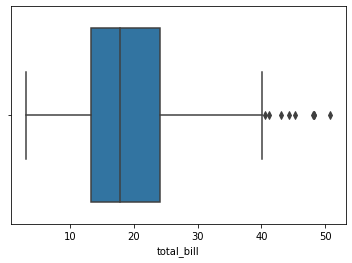

In [ ]:
sns.boxplot(df["total_bill"])

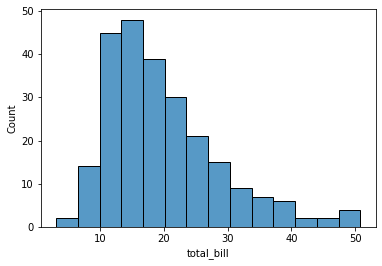

In [ ]:
## Check whether its a normally distributed data?
sns.histplot(df["total_bill"])

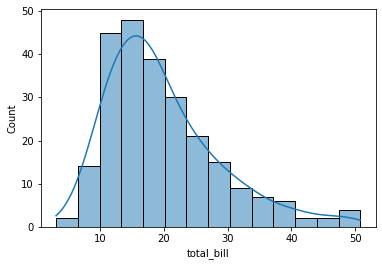

In [ ]:
sns.histplot(df["total_bill"], kde=True)

In [ ]:
## Load another dataset
df1=sns.load_dataset("iris")

In [ ]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


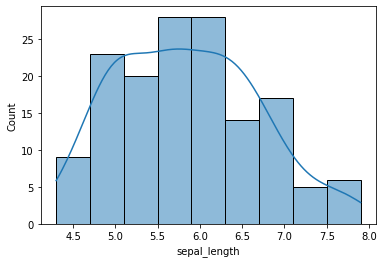

In [ ]:
sns.histplot(df1["sepal_length"],kde=True)

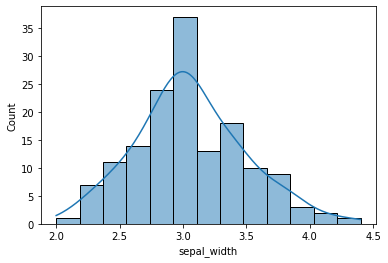

In [ ]:
sns.histplot(df1["sepal_width"],kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


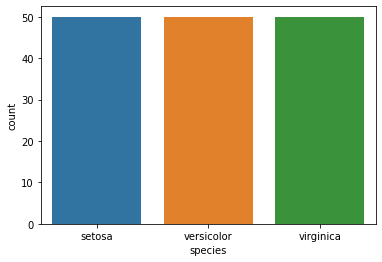

In [ ]:
sns.countplot(df1["species"])

In [ ]:
## Finding out IQR

np.percentile(df1["sepal_length"],[25,75])

array([5.1, 6.4])

In [7]:
## outliers

dataset=[11,10,12,14,12,15,14,13,15,101,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,15,12,10,14,13,15,10]

(array([34.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <a list of 10 Patch objects>)

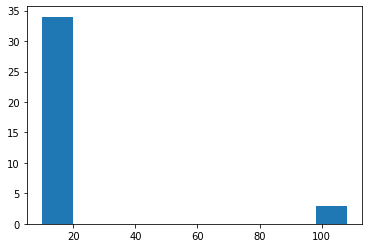

In [8]:
plt.hist(dataset)

In [9]:
## Any outliers?

## outliers

dataset=[11,10,12,14,12,15,14,13,15,101,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,15,12,10,14,13,15,10]

In [10]:
outliers=[]

In [ ]:
## Getting the values falling under a certain threshold?

In [ ]:
## Create a threshold

In [ ]:
## Create a function which takes the data, calculates mean and sd and calculate Zscore
## if it falls below or above a certain threshold, then append it in the list 

In [11]:
outliers=[]


def detect_outliers(data):
  threshold= 3 ## 3 sd away
  mean=np.mean(data)
  std=np.std(data)

  for i in data:
    z_score=(i-mean)/std
    if np.abs(z_score)>threshold:
      outliers.append(i)
  
  return outliers

In [13]:
import numpy as np
def outlier(df):
    q1=np.percentile(df, 25)
    q3=np.percentile(df, 75)
    range=q3-q1
    high=q3+(1.5*range)
    low=q1-(1.5*range)
    l=[i for i in df if (i>high) or (i<low)]
    return l

outlier(dataset)


[101, 107, 108]

In [12]:
detect_outliers(dataset)

[101, 107, 108]

In [ ]:
### IQR

1. Sort the dataset
2. Find Q1 and Q3
3. Q3-Q1
4. Find the lower fence (Q1-1.5*IQR)
5. Find the upper fence (Q3+1.5*IQR)

In [ ]:
## sorting the dataset

In [14]:
dataset=sorted(dataset)

In [15]:
dataset

[10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 101,
 107,
 108]

In [16]:
## Calculate Q1,Q3

## Finding out IQR

q1,q3=np.percentile(dataset,[25,75])

In [ ]:
q1

12.0

In [ ]:
q3

15.0

In [17]:
iqr=q3-q1

In [18]:
## Finding the lower fence and upper fence

lower_fence=q1-(1.5*iqr)
upper_fence=q3+(1.5*iqr)

print(lower_fence,upper_fence)

7.5 19.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


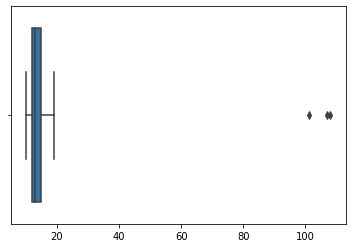

In [ ]:
sns.boxplot(dataset)

In [ ]:
## Remove those three elements and again plot the boxplot